In [ ]:
!pip install datasets

In [ ]:
from datasets import get_dataset_config_names

dataset = 'McAuley-Lab/Amazon-Reviews-2023'

try:
    dataset_branches = get_dataset_config_names(dataset, trust_remote_code=True)
except Exception as e:
    dataset_branches = f"Error fetching branches: {e}"

item_metadata_branches = []
user_review_branches = []
categories = []


for branch in dataset_branches:
    if branch.startswith("raw_meta_"):
        item_metadata_branches.append(branch)
    elif branch.startswith("raw_review_"):
        user_review_branches.append(branch)

for branch in item_metadata_branches:
    categories.append(branch.replace('raw_meta_', ''))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
categories

['All_Beauty',
 'Toys_and_Games',
 'Cell_Phones_and_Accessories',
 'Industrial_and_Scientific',
 'Gift_Cards',
 'Musical_Instruments',
 'Electronics',
 'Handmade_Products',
 'Arts_Crafts_and_Sewing',
 'Baby_Products',
 'Health_and_Household',
 'Office_Products',
 'Digital_Music',
 'Grocery_and_Gourmet_Food',
 'Sports_and_Outdoors',
 'Home_and_Kitchen',
 'Subscription_Boxes',
 'Tools_and_Home_Improvement',
 'Pet_Supplies',
 'Video_Games',
 'Kindle_Store',
 'Clothing_Shoes_and_Jewelry',
 'Patio_Lawn_and_Garden',
 'Unknown',
 'Books',
 'Automotive',
 'CDs_and_Vinyl',
 'Beauty_and_Personal_Care',
 'Amazon_Fashion',
 'Magazine_Subscriptions',
 'Software',
 'Health_and_Personal_Care',
 'Appliances',
 'Movies_and_TV']

In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = 'McAuley-Lab/Amazon-Reviews-2023'

# item = load_dataset(dataset, 'raw_meta_' + categories[0], trust_remote_code=True)
# review = load_dataset(dataset, 'raw_review_' + categories[0], trust_remote_code=True)

# item_metadata_columns = item['full'][0].keys()
# user_review_columns = review['full'][0].keys()
# item_metadata = pd.DataFrame(columns = item_metadata_columns)
# user_reviews = pd.DataFrame(columns = user_review_columns)

chosen_categories = ['Software']

for category in chosen_categories:
    items = load_dataset(dataset, 'raw_meta_' + category, trust_remote_code=True)
    item_metadata = items['full'].to_pandas()
    # item_metadata = pd.concat([item_metadata, new_data], ignore_index = True)
    reviews = load_dataset(dataset, 'raw_review_' + category, trust_remote_code=True)
    user_reviews = reviews['full'].to_pandas()
    # user_reviews = pd.concat([user_reviews, new_data], ignore_index = True)

del items
del reviews

In [ ]:
item_metadata.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Appstore for Android,Accupressure Guide,3.6,NaN,[All the pressing point has been explained wit...,[Acupressure technique is very ancient and ver...,0.0,"{'hi_res': [None, None, None, None], 'large': ...","{'title': [''], 'url': [''], 'user_id': ['']}",mAppsguru,[],"{""Release Date"": ""2015"", ""Date first listed on...",B00VRPSGEO,None,None,None
1,Appstore for Android,Ankylosaurus Fights Back - Smithsonian's Prehi...,4.0,NaN,[ENCOURAGE literacy skills with highlighted na...,[Join Ankylosaurus in this interactive book ap...,2.99,"{'hi_res': [None, None, None, None, None], 'la...","{'title': [''], 'url': [''], 'user_id': ['']}","Oceanhouse Media, Inc",[],"{""Release Date"": ""2014"", ""Date first listed on...",B00NWQXXHQ,None,None,None
2,Appstore for Android,Mahjong 2015,3.1,NaN,[Mahjong 2015 is a free solitaire matching gam...,[Mahjong 2015 is a free solitaire matching gam...,0.0,"{'hi_res': [None, None, None], 'large': ['http...","{'title': [''], 'url': [''], 'user_id': ['']}",sophiathach,[],"{""Release Date"": ""2014"", ""Date first listed on...",B00RFKP6AC,None,None,None
3,Appstore for Android,Jewels Brick Breakout,4.2,NaN,"[Game Features:, - Intuitive touch controls wi...",[Jewels Brick Breakout is a glowing jewels bri...,0.0,"{'hi_res': [None, None, None, None, None, None...","{'title': [''], 'url': [''], 'user_id': ['']}",Bad Chicken,[],"{""Release Date"": ""2015"", ""Date first listed on...",B00SP2QU0E,None,None,None
4,Appstore for Android,Traffic Police: Off-Road Cub,3.3,NaN,"[In this game you will find:, - Killer police ...",[Become the best road police officer in Cube C...,0.0,"{'hi_res': [None, None, None, None], 'large': ...","{'title': [''], 'url': [''], 'user_id': ['']}",Dast 2 For Metro,[],"{""Release Date"": ""2016"", ""Date first listed on...",B01DZIT64O,None,None,None


In [ ]:
user_reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,malware,mcaffee IS malware,[],B07BFS3G7P,B0BQSK9QCF,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1562182632076,0,False
1,5.0,Lots of Fun,I love playing tapped out because it is fun to...,[],B00CTQ6SIG,B00CTQ6SIG,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1424120336000,0,True
2,5.0,Light Up The Dark,I love this flashlight app! It really illumin...,[],B0066WJLU6,B0066WJLU6,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1362399267000,0,True
3,4.0,Fun game,One of my favorite games,[],B00KCYMAWK,B00KCYMAWK,AH6CATODIVPVUOJEWHRSRCSKAOHA,1561061428662,0,True
4,4.0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,[],B00P1RK566,B00P1RK566,AEINY4XOINMMJCK5GZ3M6MMHBN6A,1418257196000,0,True


# Basic Structure & Summary (Software)

### Item Metadata: Key Columns

main_category <br>
title <br>
average_rating <br>
rating_number <br>
features <br>
price <br>
store <br>
parent_asin <br>
bought_together <br>

### Item Metadata: Data Cleaning

In [ ]:
item_metadata = item_metadata[['parent_asin', 'title', 'average_rating', 'rating_number', 'main_category', 'features', 'description', 'price', 'store']]
item_metadata['average_rating'] = item_metadata['average_rating'].fillna(0)
item_metadata['average_rating'] = item_metadata['average_rating'].astype(float)
item_metadata['rating_number'] = item_metadata['rating_number'].fillna(0)
item_metadata['rating_number'] = item_metadata['rating_number'].astype(int)
item_metadata['main_category'] = item_metadata['main_category'].fillna('Unknown')
item_metadata['main_category'] = item_metadata['main_category'].replace('None', 'Unknown')
item_metadata['price'] = item_metadata['price'].replace('None', 0.0)
item_metadata['price'] = item_metadata['price'].astype(float)
item_metadata['store'] = item_metadata['store'].fillna('Unknown')
item_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89251 entries, 0 to 89250
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   parent_asin     89251 non-null  object 
 1   title           89251 non-null  object 
 2   average_rating  89251 non-null  float64
 3   rating_number   89251 non-null  int64  
 4   main_category   89251 non-null  object 
 5   features        89251 non-null  object 
 6   description     89251 non-null  object 
 7   price           89251 non-null  float64
 8   store           89251 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 6.1+ MB


<ipython-input-8-0cfb716328c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_metadata['average_rating'] = item_metadata['average_rating'].fillna(0)
<ipython-input-8-0cfb716328c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_metadata['average_rating'] = item_metadata['average_rating'].astype(float)
<ipython-input-8-0cfb716328c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

### User Reviews: Key Columns

rating <br>
title <br>
text <br>
parent_asin <br>
user_id <br>
timestamp <br>

### User Reviews: Data Cleaning

In [ ]:
from datetime import datetime
user_reviews = user_reviews[['user_id', 'parent_asin', 'rating', 'title', 'text', 'timestamp', 'helpful_vote', 'verified_purchase']]
user_reviews['rating'] = user_reviews['rating'].astype(int)
user_reviews['title'] = user_reviews['title'].replace('N9ne', 'None')
user_reviews['title'] = user_reviews['title'].replace('None', '')
user_reviews['text'] = user_reviews['text'].replace('N9ne', 'None')
user_reviews['text'] = user_reviews['text'].replace('None', '')
user_reviews['timestamp'] = user_reviews['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x/1000))
user_reviews['helpful_vote'] = user_reviews['helpful_vote'].fillna(0)
user_reviews['verified_purchase'] = user_reviews['verified_purchase'].astype(int)
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880181 entries, 0 to 4880180
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            object        
 1   parent_asin        object        
 2   rating             int64         
 3   title              object        
 4   text               object        
 5   timestamp          datetime64[ns]
 6   helpful_vote       int64         
 7   verified_purchase  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 297.9+ MB


In [ ]:
missing_counts = user_reviews.isnull().sum()
missing_percentage = (missing_counts / len(user_reviews)) * 100
missing_percentage

,0
user_id,0.0
parent_asin,0.0
rating,0.0
title,0.0
text,0.0
timestamp,0.0
helpful_vote,0.0
verified_purchase,0.0


Number of Items (from User Reviews)



In [ ]:
len(user_reviews['parent_asin'].unique())

89246

Number of users

In [ ]:
len(user_reviews['user_id'].unique())

2589466

# User-item interaction sparsity

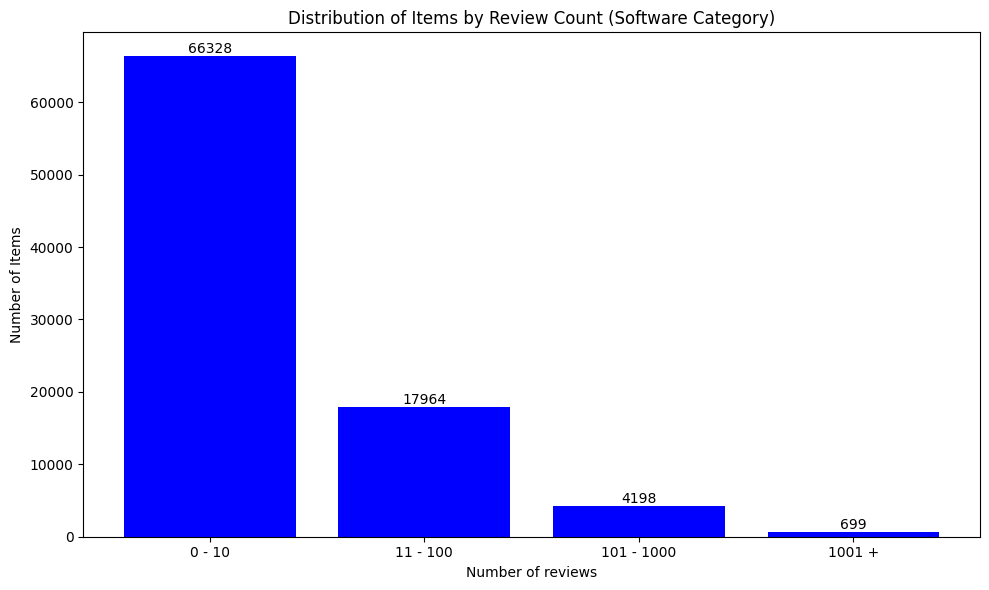

In [ ]:
import matplotlib.pyplot as plt

item_review_counts = user_reviews['parent_asin'].value_counts()

bins = [0, 10, 100, 1000, 10000]
bin_labels = ['0 - 10', '11 - 100', '101 - 1000', '1001 +']

item_review_counts_binned = pd.cut(item_review_counts, bins=bins, labels=bin_labels, right=False)

bin_counts = item_review_counts_binned.value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(bin_counts.index, bin_counts.values, color='blue')
plt.xlabel("Number of reviews")
plt.ylabel("Number of Items")
plt.title("Distribution of Items by Review Count (Software Category)")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
item_metadata[item_metadata['parent_asin'] == 'B00N28818A']

,parent_asin,title,average_rating,rating_number,main_category,features,description,price,store
17448,B00N28818A,Amazon Prime Video,4.5,221326,Appstore for Android,[Download movies and TV shows over Wi-Fi or ce...,[Stream and download popular movies and TV sho...,0.0,Amazon.com


In [ ]:
user_reviews[user_reviews['parent_asin'] == 'B00N28818A']

,user_id,parent_asin,rating,title,text,timestamp,helpful_vote,verified_purchase
662,AGDUXF4E7K4X5WBBCKNPG6AD2UCA,B00N28818A,1,need to make universally friendly for all devices,I try to be someone who is not solely dedicate...,2015-01-06 05:07:34.000,0,1
699,AHJ2CDYLH4BNPIDVY3TIDSBNRRPA,B00N28818A,5,Always something new to watch,"Great Content, I Love the Original Series like...",2018-11-27 09:19:37.446,0,1
919,AHF5OLUZ6VKGFAJ7J5CIPI57O7GQ,B00N28818A,5,Five Stars,"Right on, wish there would be casting option",2016-12-28 05:09:23.000,0,1
1024,AFTDSPCG32FV2VPWLEYPDQARTSQA,B00N28818A,5,Awesome,Awesome.,2019-02-05 14:59:54.327,0,1
1043,AESGMCRKQKHIAIJUL72FWQYVS6MA,B00N28818A,3,Not what i expected,"Very jerky app, smooth operation not available...",2017-08-22 20:49:33.285,0,1
...,...,...,...,...,...,...,...,...
4879827,AFLZ4I5TJ577VMIJ43WLHSBJH3SA,B00N28818A,4,easy to use,"Seamless, easy to use. No lagging. Really enjo...",2015-12-15 04:56:11.000,0,1
4879917,AG4GRL7BCJYS3QBBONP45VONOPAQ,B00N28818A,5,Five Stars,Great and easy to use.,2017-07-18 00:38:39.756,0,1
4879968,AHTKXNQ3DQIBO33TNK2GHXPXYKRA,B00N28818A,5,What i think,Awesome,2017-07-05 10:11:36.000,0,1
4880014,AEZDP7WNDKJCUDXPMCNZHNDV4H5A,B00N28818A,5,Five Stars,Great app..easy to use.,2016-03-20 17:22:40.000,0,1


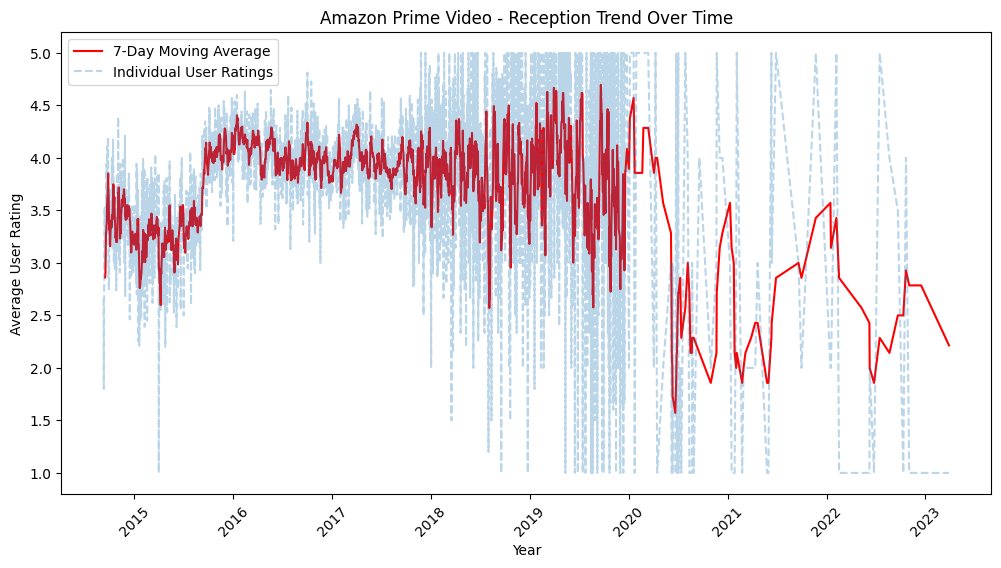

In [ ]:
import seaborn as sns
# Aggregate user ratings by day for product B00N28818A
daily_ratings = user_reviews[user_reviews['parent_asin'] == 'B00N28818A']
daily_ratings = daily_ratings.groupby(user_reviews['timestamp'].dt.date)['rating'].mean().reset_index()
daily_ratings.columns = ['date', 'avg_rating']

# Apply a 7-day moving average to smooth fluctuations
daily_ratings['smoothed_rating'] = daily_ratings['avg_rating'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='smoothed_rating', data=daily_ratings, label="7-Day Moving Average", color='red')
sns.lineplot(x='date', y='avg_rating', data=daily_ratings, alpha=0.3, label="Individual User Ratings", linestyle='dashed')

plt.xlabel("Year")
plt.ylabel("Average User Rating")
plt.title("Amazon Prime Video - Reception Trend Over Time")
plt.legend()
plt.xticks(rotation=45)

plt.show()


In [ ]:
review_counts = user_reviews['parent_asin'].value_counts().reset_index()
review_counts.columns = ['parent_asin', 'review_count']
review_counts

,parent_asin,review_count
0,B00FAPF5U0,50891
1,B00N28818A,46940
2,B00992CF6W,44324
3,B005ZXWMUS,33079
4,B0094BB4TW,30212
...,...,...
89241,B07SHG56NV,1
89242,B00QF021NI,1
89243,B07N8CM6RB,1
89244,B00ZVF7H32,1


<ipython-input-18-bdeec22f27c4>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(item_metadata['rating_number'], item_metadata['average_rating'],


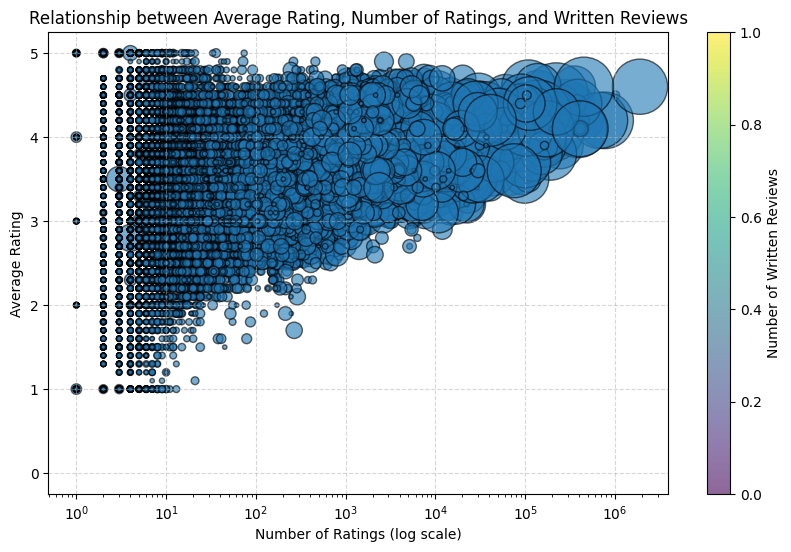

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

item_metadata = item_metadata.merge(review_counts, on='parent_asin', how='left')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(item_metadata['rating_number'], item_metadata['average_rating'],
                      s=np.sqrt(item_metadata['review_count']) * 10,
                      alpha=0.6, edgecolors='k', cmap='viridis')

plt.xscale('log')
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Average Rating")
plt.title("Relationship between Average Rating, Number of Ratings, and Written Reviews")
plt.colorbar(label="Number of Written Reviews")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


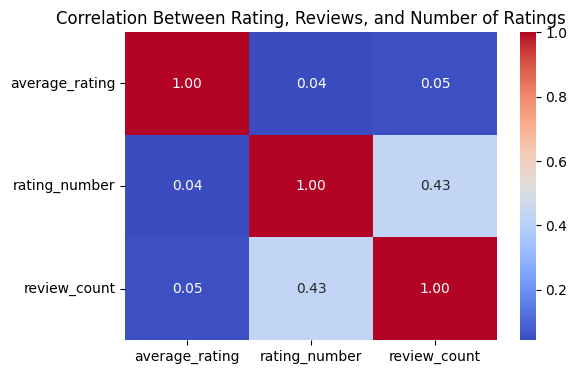

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(item_metadata[['average_rating', 'rating_number', 'review_count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Rating, Reviews, and Number of Ratings")
plt.show()


Metedata is available for all items that are referenced in the user_reviews.

In [ ]:
missing_item_ids = set(user_reviews['parent_asin']) - set(item_metadata['parent_asin'])
print("Missing item IDs:", missing_item_ids)

Missing item IDs: set()


### Explore scope for collaborative and content based filtering

> Add blockquote



# Tokenization of Reviews
If needed, convert ratings into implicit feedback (1 if rated, 0 if not).



In [ ]:
user_reviews

,user_id,parent_asin,rating,title,text,timestamp,helpful_vote,verified_purchase
0,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B0BQSK9QCF,1,malware,mcaffee IS malware,2019-07-03 19:37:12.076,0,0
1,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,B00CTQ6SIG,5,Lots of Fun,I love playing tapped out because it is fun to...,2015-02-16 20:58:56.000,0,1
2,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,B0066WJLU6,5,Light Up The Dark,I love this flashlight app! It really illumin...,2013-03-04 12:14:27.000,0,1
3,AH6CATODIVPVUOJEWHRSRCSKAOHA,B00KCYMAWK,4,Fun game,One of my favorite games,2019-06-20 20:10:28.662,0,1
4,AEINY4XOINMMJCK5GZ3M6MMHBN6A,B00P1RK566,4,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,2014-12-11 00:19:56.000,0,1
...,...,...,...,...,...,...,...,...
4880176,AGOKECUMAI3W6MC7A7KBFBJVPN7Q,B0763N3MVW,5,Gog,Very fun and addictive and exciting,2020-12-25 18:04:28.753,0,1
4880177,AH6AMUNDOSZ2SGDIDMYSRE4RNMDQ,B00ET56Y48,1,WORST GAME EVER,WORST GAME EVER TOXIC PEOPLE AND BAD CONNECTIO...,2021-01-06 22:54:07.689,1,1
4880178,AH4PJ73QN75AJM5VSCT53AOADCGA,B009ZKSPDK,5,better!!!,This fabulous game is 10000 times better than ...,2013-05-28 06:23:36.000,2,1
4880179,AHQETDYKHVDNGMGBWVJL6VJXJGFQ,B00M9J3IOA,5,It Has Everything I Need And More,Awesome! I upgraded from CorelDraw 8. I was wo...,2016-09-03 17:21:31.000,0,1


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

user_reviews = user_reviews[user_reviews['parent_asin'] == 'B00N28818A']

user_reviews['review'] = user_reviews['title'] + ' ' + user_reviews['text']
user_reviews['sentiment'] = user_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

user_reviews.head(15)

<ipython-input-24-92721b013065>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_reviews['review'] = user_reviews['title'] + ' ' + user_reviews['text']
<ipython-input-24-92721b013065>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_reviews['sentiment'] = user_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


,user_id,parent_asin,rating,title,text,timestamp,helpful_vote,verified_purchase,review,sentiment
662,AGDUXF4E7K4X5WBBCKNPG6AD2UCA,B00N28818A,1,need to make universally friendly for all devices,I try to be someone who is not solely dedicate...,2015-01-06 05:07:34.000,0,1,need to make universally friendly for all devi...,0.274545
699,AHJ2CDYLH4BNPIDVY3TIDSBNRRPA,B00N28818A,5,Always something new to watch,"Great Content, I Love the Original Series like...",2018-11-27 09:19:37.446,0,1,"Always something new to watch Great Content, I...",0.476278
919,AHF5OLUZ6VKGFAJ7J5CIPI57O7GQ,B00N28818A,5,Five Stars,"Right on, wish there would be casting option",2016-12-28 05:09:23.000,0,1,"Five Stars Right on, wish there would be casti...",0.285714
1024,AFTDSPCG32FV2VPWLEYPDQARTSQA,B00N28818A,5,Awesome,Awesome.,2019-02-05 14:59:54.327,0,1,Awesome Awesome.,1.000000
1043,AESGMCRKQKHIAIJUL72FWQYVS6MA,B00N28818A,3,Not what i expected,"Very jerky app, smooth operation not available...",2017-08-22 20:49:33.285,0,1,"Not what i expected Very jerky app, smooth ope...",0.233333
1184,AFIILFLTBWOTZ5Y7FAHBU3IQDCMQ,B00N28818A,5,Five Stars,I use this on my ps4 and I love it. It works o...,2016-02-05 17:09:35.000,0,1,Five Stars I use this on my ps4 and I love it....,0.500000
1504,AEI6PVESNCWAQYNYNQ25O4U4OIHQ,B00N28818A,1,Stick with Netflix.,Basically the same movies and tv shows that ar...,2015-06-29 07:01:38.000,0,1,Stick with Netflix. Basically the same movies ...,0.045833
2053,AHTBBASAHXHHOXKLSSZG2IPUDDFA,B00N28818A,5,Nice App,I recently tried the &#34;Prime Instant Video&...,2015-04-04 18:34:55.000,0,1,Nice App I recently tried the &#34;Prime Insta...,0.199809
2055,AG7H465T24KLO6MGEZB5WYY3DDJQ,B00N28818A,5,Great shows and movies!!,They have great original series.. boardwalk em...,2018-02-24 00:51:43.098,0,1,Great shows and movies!! They have great origi...,0.621875
2865,AGT2JM2VGEZD7NKADGKSCEHZB7CQ,B00N28818A,5,Five Stars,Great selection,2016-05-12 07:25:50.000,0,1,Five Stars Great selection,0.800000


<ipython-input-25-b8bb48b5369f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['sentiment'], label=f'{rating} Star', shade=True)
<ipython-input-25-b8bb48b5369f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['sentiment'], label=f'{rating} Star', shade=True)
<ipython-input-25-b8bb48b5369f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['sentiment'], label=f'{rating} Star', shade=True)
<ipython-input-25-b8bb48b5369f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['s

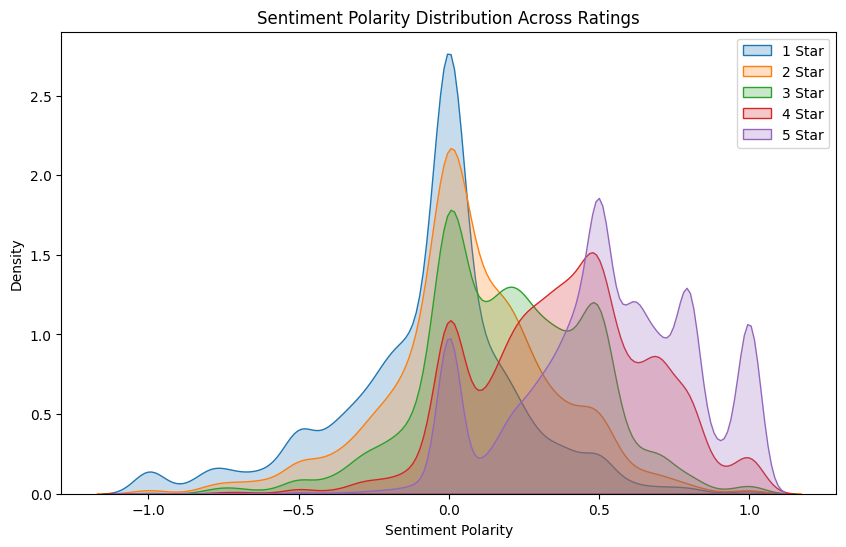

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
for rating in sorted(user_reviews['rating'].unique()):
    subset = user_reviews[user_reviews['rating'] == rating]
    sns.kdeplot(subset['sentiment'], label=f'{rating} Star', shade=True)

plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.title('Sentiment Polarity Distribution Across Ratings')
plt.legend()
plt.show()

In [ ]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datasets import load_dataset
from textblob import TextBlob
from sentence_transformers import SentenceTransformer

dataset = 'McAuley-Lab/Amazon-Reviews-2023'

reviews = load_dataset(dataset, 'raw_review_Software', trust_remote_code=True)
user_reviews = reviews['full'].to_pandas()
del reviews

user_reviews = user_reviews[user_reviews['parent_asin'] == 'B00N28818A']
user_reviews = user_reviews[['user_id', 'parent_asin', 'rating', 'title', 'text', 'timestamp']]

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])

    return no_punct

def remove_stopwords(document):

    words = [word for word in document if not word in stop_words]

    return words

porter = PorterStemmer()

def stemmer(document):

    stemmed_document = [porter.stem(word) for word in document]

    return stemmed_document

stop_words = set(stopwords.words('english'))

user_reviews['review'] = user_reviews['title'] + ' ' + user_reviews['text']
user_reviews['review_processed'] = user_reviews['review'].str.lower()
user_reviews['review_processed'] = user_reviews['review_processed'].apply(remove_punctuation)
user_reviews['review_processed'] = user_reviews['review_processed'].str.replace(r'\d+', '', regex=True)
user_reviews['review_processed'] = user_reviews['review_processed'].apply(word_tokenize)
user_reviews['review_processed'] = user_reviews['review_processed'].apply(remove_stopwords)
user_reviews['review_processed'] = user_reviews['review_processed'].apply(stemmer)

user_reviews['sentiment'] = user_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
user_reviews['review_detokenized'] = user_reviews['review_processed'].apply(TreebankWordDetokenizer().detokenize)
user_reviews['bert_embedding'] = user_reviews['review_detokenized'].apply(lambda x: bert_model.encode(x))

user_reviews[['user_id', 'parent_asin', 'rating',	'title', 'text', 'review', 'review_processed', 'sentiment', 'bert_embedding']].head(15)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

KeyboardInterrupt: 

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

text_detokenized = user_reviews['review_processed'].apply(TreebankWordDetokenizer().detokenize)
# text_detokenized

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_detokenized)
sparse_dtm

In [ ]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns = countvec.get_feature_names_out (), index = user_reviews.index)
dtm

# Product similarity

In [ ]:
item_metadata.info()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import cdist

# Sample smaller dataset (Modify for full dataset)
item_metadata = item_metadata.sample(5000, random_state=42)

# Ensure features are strings
item_metadata['features'] = item_metadata['features'].fillna('').astype(str)
item_metadata['description'] = item_metadata['description'].fillna('').astype(str)
item_metadata['main_category'] = item_metadata['main_category'].fillna('Unknown')

# TF-IDF Vectorization for text-based features
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
text_matrix = tfidf.fit_transform(item_metadata['features'] + " " + item_metadata['description'])

# One-Hot Encoding for categories
encoder = OneHotEncoder()
category_matrix = encoder.fit_transform(item_metadata[['main_category']])

# Combine all features
combined_matrix = np.hstack([text_matrix.toarray(), category_matrix.toarray()])

# Reduce dimensions (Optional: helps with performance)
svd = TruncatedSVD(n_components=100)
reduced_matrix = svd.fit_transform(combined_matrix)

# Compute pairwise cosine similarity (in batches to avoid memory errors)
def cosine_similarity_batched(matrix, query_index, top_n=5):
    query_vector = matrix[query_index].reshape(1, -1)
    distances = cdist(query_vector, matrix, metric='cosine')[0]
    similar_indices = np.argsort(distances)[:top_n+1]  # +1 to exclude self
    return [(idx, 1 - distances[idx]) for idx in similar_indices if idx != query_index]

# Example: Find 5 most similar products to the first one
product_index = 0
similar_items = cosine_similarity_batched(reduced_matrix, product_index, top_n=5)

print(f"Top 5 similar products to '{item_metadata.iloc[product_index]['title']}':\n")
for idx, score in similar_items:
    print(f"{item_metadata.iloc[idx]['title']} (Similarity Score: {score:.4f})")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import cdist

# Load dataset (Ensure item_metadata is defined)
# item_metadata = pd.read_csv("your_file.csv")

# Sample smaller dataset (Modify as needed)
item_metadata = item_metadata.sample(500, random_state=42)  # Reduce for memory efficiency

# Ensure features are strings
item_metadata['features'] = item_metadata['features'].fillna('').astype(str)
item_metadata['description'] = item_metadata['description'].fillna('').astype(str)
item_metadata['main_category'] = item_metadata['main_category'].fillna('Unknown')

# TF-IDF Vectorization for text-based features
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
text_matrix = tfidf.fit_transform(item_metadata['features'] + " " + item_metadata['description'])

# One-Hot Encoding for categories
encoder = OneHotEncoder()
category_matrix = encoder.fit_transform(item_metadata[['main_category']])

# Combine all features
combined_matrix = np.hstack([text_matrix.toarray(), category_matrix.toarray()])

# Reduce dimensions (Optional)
svd = TruncatedSVD(n_components=100)
reduced_matrix = svd.fit_transform(combined_matrix)

# Compute cosine similarity matrix
similarity_matrix = 1 - cdist(reduced_matrix, reduced_matrix, metric='cosine')

# Convert to DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=item_metadata['title'], columns=item_metadata['title'])

# Display similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df.iloc[:20, :20], cmap='coolwarm', annot=False)
plt.title("Product Similarity Heatmap (Sample of 20 Products)")
plt.xlabel("Products")
plt.ylabel("Products")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Show the first 20 rows of the similarity matrix
similarity_df.head(20)


In [ ]:
!pip install spacy keybert
!python -m spacy download en_core_web_sm

In [ ]:
import pandas as pd
import spacy
from keybert import KeyBERT

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# # Sample dataset (Modify as needed)
# item_metadata = pd.DataFrame({
#     'title': ["Wireless Headphones Sony", "Logitech Gaming Mouse", "Apple iPhone Case"],
#     'description': [
#         "Sony Bluetooth wireless over-ear headphones with noise cancellation and deep bass.",
#         "Logitech ergonomic gaming mouse with RGB lighting and programmable buttons.",
#         "Durable shockproof case for iPhone and Samsung smartphones, made by Apple."
#     ]
# })

# Initialize KeyBERT for keyword extraction
kw_model = KeyBERT()

# Function to extract brand names using spaCy NER
def extract_brands(text):
    doc = nlp(text)
    brands = [ent.text for ent in doc.ents if ent.label_ in ["ORG", "PRODUCT"]]
    return ", ".join(set(brands)) if brands else "Unknown"

# Function to extract top keywords using KeyBERT
def extract_keywords(text):
    keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words="english", top_n=5)
    return ", ".join([kw[0] for kw in keywords])

# Apply functions to dataset
item_metadata["brand_names"] = item_metadata["description"].apply(extract_brands)
item_metadata["keywords"] = item_metadata["description"].apply(extract_keywords)

# Show extracted brand names and keywords in Pandas
print(item_metadata[["title", "brand_names", "keywords"]])

# Save to CSV if needed
item_metadata.to_csv("extracted_brands_keywords.csv", index=False)



In [ ]:
item_metadata[["title", "brand_names", "keywords"]].head(15)

In [ ]:
import pandas as pd
import spacy
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import numpy as np
import os

# 加载 spaCy 的 NER 模型 (中文 & 英文)
nlp = spacy.load("zh_core_web_sm")

# 初始化 KeyBERT 模型
kw_model = KeyBERT()

# 加载 SentenceTransformer (更广泛 & 快速的模型)
model = SentenceTransformer('all-MiniLM-L6-v2')

# 临时保存文件路径 (断点续跑)
TEMP_FILE = 'temp_full_hashtags_results.csv'

# 【Step 1】提取品牌/商品名 (NER)
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]  # 提取命名实体
    return entities

# 【Step 2】提取关键词 (KeyBERT)
def extract_keywords(text, top_n=10):
    keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 3), top_n=top_n)
    return [kw[0] for kw in keywords]

# 【Step 3】整合关键词 & 品牌/商品名
def combine_keywords(text):
    entities = extract_entities(text)
    keywords = extract_keywords(text)
    combined_keywords = list(set(entities + keywords))  # 去重
    return combined_keywords

# 【Step 4】使用 MiniLM 生成 Hashtags
def generate_hashtags(text, min_hashtags=3, max_hashtags=10):
    combined_text = ' '.join(combine_keywords(text))  # 加入关键词 & 品牌

    # 检查 combined_text 是否为空
    if not combined_text.strip():
        return ['#unknown']

    # 生成标签
    words = combined_text.split()
    hashtags = [f"#{word.replace(' ', '_')}" for word in words]

    # 无视大小写去重
    hashtags = list({tag.lower(): tag for tag in hashtags}.values())

    # 调整标签数量在 3-10 之间
    if len(hashtags) < min_hashtags:
        hashtags.extend(hashtags[:min_hashtags - len(hashtags)])  # 补充
    return hashtags[:max_hashtags]

# 【Step 5】检查是否存在已保存的临时文件
if os.path.exists(TEMP_FILE):
    processed_df = pd.read_csv(TEMP_FILE)
    processed_count = len(processed_df)
    print(f"✅ Found existing progress file. Resuming from row {processed_count}...")
else:
    processed_df = pd.DataFrame()
    processed_count = 0

# 【Step 6】获取未处理的数据
remaining_data = item_metadata[1:10].iloc[processed_count:]

# 每 5,000 条记录保存一次
batch_size = 5000

for i in tqdm(range(0, len(remaining_data), batch_size), desc="Generating Hashtags", unit="caption"):
    batch = remaining_data.iloc[i:i + batch_size].copy()

    # 数据清洗
    batch['description'].fillna('', inplace=True)  # 处理 NaN 数据
    batch['description'] = batch['description'].astype(str)  # 转换为字符串

    # 批量处理文本
    batch['hashtags'] = batch['description'].apply(lambda x: generate_hashtags(x, min_hashtags=3, max_hashtags=10))

    # 将结果拼接到已处理的部分
    processed_df = pd.concat([processed_df, batch], ignore_index=True)

    # 定期保存进度
    processed_df.to_csv(TEMP_FILE, index=False)